# Ford GoBike System Data
## by Mennat-Allah Mustapha


## Investigation Overview

> Take a look back through the past period to know the users better and know the usage patterns

>such as :
>* When most trips are taken in terms of time of day, day of the week
>* average trip time
>* Does the above depend on user age / gender or if the user is a subscriber or customer or age?
>* most visted stations

## Dataset Overview

> The dataset records 183412 entries(trips). the system has 4646 bikes and 329 stations. There are some missing data in members' coloumns (gender and birthyear)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading the data
df=pd.read_csv("201902-fordgobike-tripdata.csv")

#make a copy df not to disturb the original data
df2 = df.copy()

#convert time columns into datetime to can make aggregations
df2['start_time'] = pd.to_datetime(df['start_time'])
df2['end_time'] = pd.to_datetime(df['end_time'])

#converting duration into minutes to be more reasonable and easier in observations
df2["duration_min"]=(df2['duration_sec']/60).round(2)

#drop the rows with missing data
df2.dropna(axis=0,inplace=True)

#calculate the users age
import datetime

df2['user_age']= datetime.datetime.now().year - df2['member_birth_year']
df2['user_age'].astype(int)
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75,36.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.90,48.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.17,31.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.42,46.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.88,61.0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Average rides time in minutes

>Most rides durations are less than 20 mins specificaly around 10 mins. but there are exceptional rides exceeded 100 min and few that have between 40 and 80 mins


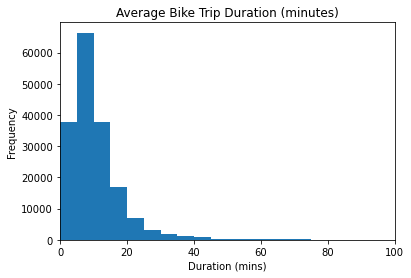

In [3]:
bin_edges = np.arange(0, df2['duration_min'].max()+5 , 5)
plt.hist(data = df2 , x = 'duration_min' , bins = bin_edges);
plt.xlim(0,100);
plt.xlabel('Duration (mins)');
plt.ylabel("Frequency");
plt.title('Average Bike Trip Duration (minutes)');

## Number of rides per day

> Most rides happen on day(3) which is Thursday and less rides happen on days (5,6) which are Saturday and Sunday by mostly equal frequency
> Days of uasage don't differ much from males to females, Thursday still the most day with rides

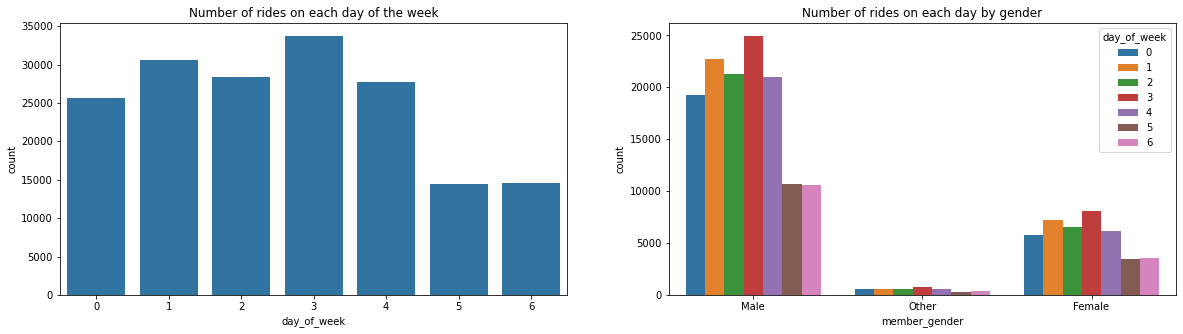

In [4]:
# have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1

df2['day_of_week'] = pd.DatetimeIndex(df2['start_time']).weekday
base_color=sb.color_palette()[0]
sb.countplot(data = df2 , x = 'day_of_week' , color = base_color);
plt.title('Number of rides on each day of the week');

#see if number of rides on different days depends on gender
plt.subplot(1, 2, 2)
plt.title('Number of rides on each day by gender')
sb.countplot(data = df2, x = 'member_gender', hue = 'day_of_week');

## During the day, users follow a remarkable pattern

> Most rides happen in the morning and the evening, which makes sense beacuase these are the rush hours in the day

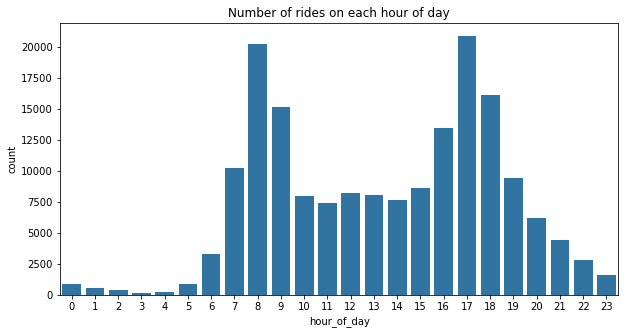

In [5]:
#getting number of rides per hour during the days
df2['hour_of_day'] = pd.DatetimeIndex(df2['start_time']).hour
df2.head(1)
plt.figure(figsize=(10,5))
sb.countplot(data = df2 , x = 'hour_of_day' , color = base_color);
plt.title('Number of rides on each hour of day');

## How the average trip time is affected by gender and age

>Younger users (between 20 and 40 years old) take longer rides as well as most of them are males

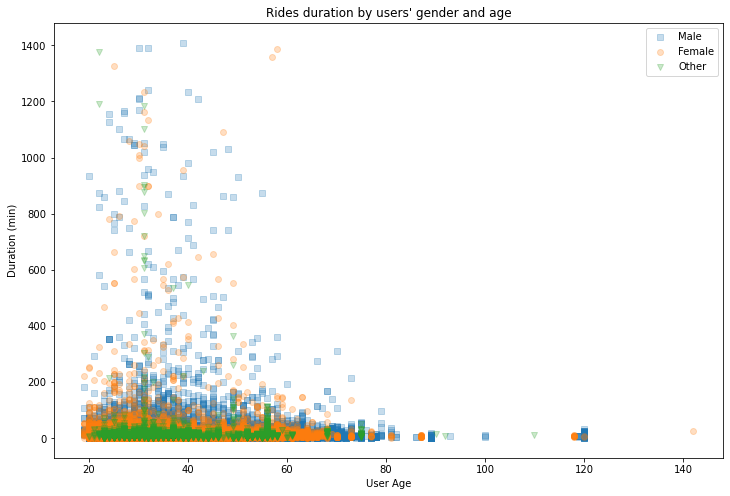

In [6]:
# Finding out how the average trip time is affected by gender and age
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]
plt.figure(figsize=(12,8));
for gender, marker in gender_markers:
    df_gender = df2[df2['member_gender'] == gender]
    plt.scatter((df_gender['user_age']), df_gender['duration_min'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other']);
plt.xlabel('User Age');
plt.ylabel('Duration (min)');
plt.title("Rides duration by users' gender and age")
plt.show();


## Most visited stations
>Station (San Francisco Caltrain Station2) has the most number of rides starts, with about 3400 rides but the forth place as end station with about 3800 rides

>Station (Berry ST) has the second most most number of rides starts, with about 2900 rides but the sixth place as end station with about 2600

>Station (Market St at 10th st) has most rides as end station with more than 3500 rides but not in the top 10 stations as start station

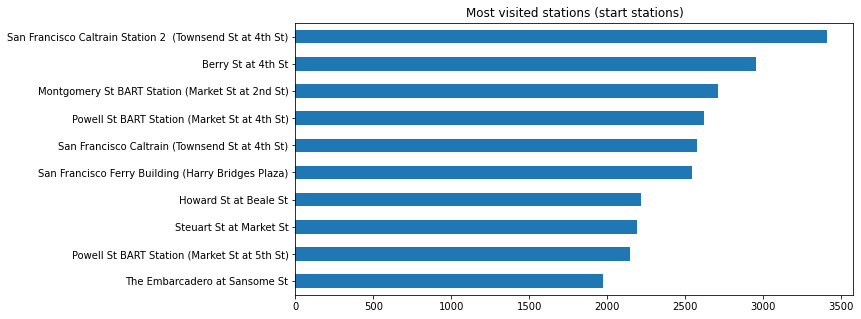

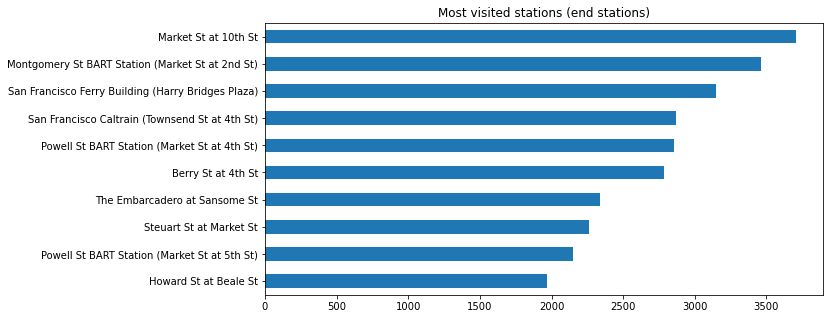

In [7]:

plt.figure(figsize =(10,5))
top10_start = df2.start_station_name.value_counts()[1:11].sort_values()
#plot the names on y axis
top10_start.plot(kind = 'barh')
plt.title('Most visited stations (start stations)');

plt.figure(figsize =(10,5))
top10_end = df2.end_station_name.value_counts()[1:11].sort_values()
#plot the names on y axis
top10_end.plot(kind = 'barh')
plt.title('Most visited stations (end stations)');

In [8]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 478409 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\20109\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\20109\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\20109\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\20109\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\20109\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File